In [1]:
import pickle
import pandas as pd
from ForecastEvaluator import ForecastEvaluator
from my_config import MyConfig

# Load the predictions from the pickle file
with open(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\OLS_performance_predictions_df.pkl', 'rb') as f:
    model_ols_df = pickle.load(f)


with open(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\LSTM_y_test.pkl', 'rb') as f:
    model_lstm_y_test_df = pickle.load(f)

with open(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\LSTM_preds.pkl', 'rb') as f:
    model_lstm_preds_df = pickle.load(f)


In [2]:
display(model_ols_df)
model_ols_df['Error'] = model_ols_df['Actual'] - model_ols_df['Predicted']
model_ols_df['timestamp'] = pd.to_datetime(model_ols_df.index)
model_ols_df['date'] = model_ols_df['timestamp'].dt.date
model_ols_df['minute_of_day'] = model_ols_df['timestamp'].dt.hour * 60 + model_ols_df['timestamp'].dt.minute
display(model_ols_df)
import numpy as np
model_ols_df['squared_error'] = (model_ols_df['Actual'] - model_ols_df['Predicted']) ** 2
rmse_df = (
    model_ols_df
    .groupby(['minute_of_day'])['squared_error']
    .mean()
    .reset_index()
)
rmse_df['rmse'] = np.sqrt(rmse_df['squared_error'])
rmse_df = rmse_df.drop(columns='squared_error')
model_ols_rmse_df = rmse_df.copy()
rmse_df

,Actual,Predicted
2023-01-01 00:00:00,0.0,0.0
2023-01-01 00:01:00,0.0,0.0
2023-01-01 00:02:00,0.0,0.0
2023-01-01 00:03:00,0.0,0.0
2023-01-01 00:04:00,0.0,0.0
...,...,...
2024-12-30 23:56:00,0.0,0.0
2024-12-30 23:57:00,0.0,0.0
2024-12-30 23:58:00,0.0,0.0
2024-12-30 23:59:00,0.0,0.0


,Actual,Predicted,Error,timestamp,date,minute_of_day
2023-01-01 00:00:00,0.0,0.0,0.0,2023-01-01 00:00:00,2023-01-01,0
2023-01-01 00:01:00,0.0,0.0,0.0,2023-01-01 00:01:00,2023-01-01,1
2023-01-01 00:02:00,0.0,0.0,0.0,2023-01-01 00:02:00,2023-01-01,2
2023-01-01 00:03:00,0.0,0.0,0.0,2023-01-01 00:03:00,2023-01-01,3
2023-01-01 00:04:00,0.0,0.0,0.0,2023-01-01 00:04:00,2023-01-01,4
...,...,...,...,...,...,...
2024-12-30 23:56:00,0.0,0.0,0.0,2024-12-30 23:56:00,2024-12-30,1436
2024-12-30 23:57:00,0.0,0.0,0.0,2024-12-30 23:57:00,2024-12-30,1437
2024-12-30 23:58:00,0.0,0.0,0.0,2024-12-30 23:58:00,2024-12-30,1438
2024-12-30 23:59:00,0.0,0.0,0.0,2024-12-30 23:59:00,2024-12-30,1439


,minute_of_day,rmse
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1435,1435,0.0
1436,1436,0.0
1437,1437,0.0
1438,1438,0.0


<Axes: title={'center': 'RMSE per minute of day'}, xlabel='minute_of_day'>

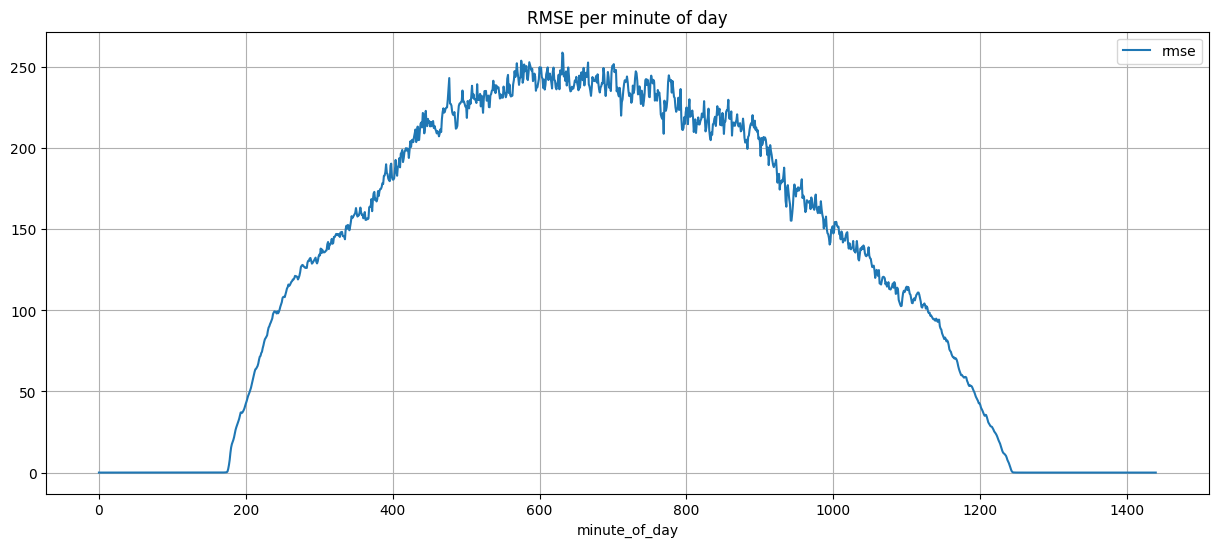

In [3]:
model_ols_rmse_df.plot(x='minute_of_day', y='rmse', figsize=(15, 6), title='RMSE per minute of day', grid=True)

In [4]:
from data_loader import MyDataLoader, SPLIT, load_config

my_config = load_config(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\configs\dni_only\dni.json')
data_loader = MyDataLoader(my_config)
data_loader.load_data()
data_loader.reindex_full_range()
data_loader.lag_features()
data_loader.prepare_df(drop_solar_altitude_below_0=True, drop_nan=True)
data_loader.get_split(SPLIT.TEST).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469971 entries, 2023-01-01 08:43:00 to 2024-12-30 14:40:00
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DNI           469971 non-null  float64
 1   DNI_lag_60    469971 non-null  float64
 2   DNI_lag_1440  469971 non-null  float64
 3   DNI_lag_2880  469971 non-null  float64
dtypes: float64(4)
memory usage: 17.9 MB


In [5]:
model_ols_df = model_ols_df.loc[data_loader.get_split(SPLIT.TEST).index]
model_ols_df

,Actual,Predicted,Error,timestamp,date,minute_of_day,squared_error
2023-01-01 08:43:00,0.004765,1.937249,-1.932484,2023-01-01 08:43:00,2023-01-01,523,3.734494
2023-01-01 08:44:00,0.000000,2.087521,-2.087521,2023-01-01 08:44:00,2023-01-01,524,4.357743
2023-01-01 08:45:00,0.000000,2.757329,-2.757329,2023-01-01 08:45:00,2023-01-01,525,7.602866
2023-01-01 08:46:00,0.000000,2.400412,-2.400412,2023-01-01 08:46:00,2023-01-01,526,5.761978
2023-01-01 08:47:00,0.000000,2.288358,-2.288358,2023-01-01 08:47:00,2023-01-01,527,5.236582
...,...,...,...,...,...,...,...
2024-12-30 14:36:00,0.000000,0.000000,0.000000,2024-12-30 14:36:00,2024-12-30,876,0.000000
2024-12-30 14:37:00,0.000000,0.000000,0.000000,2024-12-30 14:37:00,2024-12-30,877,0.000000
2024-12-30 14:38:00,0.000000,0.000000,0.000000,2024-12-30 14:38:00,2024-12-30,878,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000,2024-12-30 14:39:00,2024-12-30,879,0.000000


In [6]:
ForecastEvaluator(
    y_true=model_ols_df['Actual'],
    y_pred=model_ols_df['Predicted'],
).evaluate_all()

{'RMSE': np.float64(226.74959090701074),
 'MAE': 148.85025760267726,
 'MAPE': np.float64(29609.33202427188),
 'R2': 0.5292892182401485,
 'NMAE': np.float64(0.14913871508108437),
 'NRMSE': np.float64(0.22718900979869633),
 'Skill Score': 0.5292892182401486,
 'MBE': np.float64(-22.718757898118813)}

In [7]:
display(model_lstm_preds_df, model_lstm_y_test_df)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
2023-01-01 08:43:00,-0.048148,0.494937,0.615640,0.594018,0.555015,0.530530,0.539306,0.534362,0.553845,0.551583,...,0.322079,0.282777,0.258599,0.282595,0.294673,0.291650,0.297855,0.302125,0.308534,0.311530
2023-01-01 08:44:00,0.016651,0.509890,0.632064,0.604456,0.552375,0.541821,0.529704,0.547868,0.538205,0.536498,...,0.270718,0.244384,0.269567,0.281077,0.276902,0.281343,0.283484,0.289790,0.291402,0.290524
2023-01-01 08:45:00,0.282815,0.553061,0.658561,0.592979,0.549226,0.521411,0.526594,0.517605,0.517124,0.523581,...,0.235985,0.262292,0.273747,0.268966,0.272150,0.272758,0.278395,0.279107,0.278012,0.281161
2023-01-01 08:46:00,0.145352,0.529319,0.614957,0.572086,0.513198,0.496261,0.494005,0.494034,0.501290,0.513603,...,0.260854,0.272772,0.267497,0.269826,0.269165,0.273308,0.273637,0.272277,0.275349,0.279923
2023-01-01 08:47:00,0.097872,0.529738,0.580010,0.497954,0.460588,0.448834,0.453399,0.458636,0.472585,0.481015,...,0.266316,0.259454,0.259852,0.257371,0.261324,0.260472,0.259494,0.261792,0.265967,0.275304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 13:36:00,-0.081052,0.618320,0.468102,0.360915,0.334864,0.307295,0.277862,0.253161,0.229106,0.209620,...,0.176904,0.176888,0.176911,0.176936,0.176991,0.177028,0.177070,0.177083,0.177073,0.177090
2024-12-30 13:37:00,-0.081052,0.618320,0.468102,0.361882,0.336029,0.309704,0.280839,0.255307,0.228733,0.208838,...,0.176902,0.176888,0.176909,0.176933,0.176991,0.177025,0.177069,0.177083,0.177079,0.177093
2024-12-30 13:38:00,-0.081052,0.618320,0.469253,0.362962,0.337288,0.312267,0.283205,0.255497,0.228121,0.209481,...,0.176897,0.176943,0.176894,0.176924,0.176983,0.177026,0.177059,0.177089,0.177077,0.177089
2024-12-30 13:39:00,-0.081052,0.622163,0.470345,0.364059,0.338725,0.313925,0.283668,0.255378,0.229199,0.210273,...,0.176896,0.176942,0.176899,0.176927,0.176986,0.177029,0.177075,0.177079,0.177077,0.177092


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
2023-01-01 08:43:00,0.004765,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 08:44:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 08:45:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.004372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 08:46:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.004372,0.009728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 08:47:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004372,0.009728,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 13:36:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-30 13:37:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-30 13:38:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-30 13:39:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
t = 59

model_lstm_df = pd.DataFrame({
    'Actual': model_lstm_y_test_df[:][::1][t],
    'Predicted': model_lstm_preds_df[:][::1][t]
})
model_lstm_df

,Actual,Predicted
2023-01-01 08:43:00,0.0,0.311530
2023-01-01 08:44:00,0.0,0.290524
2023-01-01 08:45:00,0.0,0.281161
2023-01-01 08:46:00,0.0,0.279923
2023-01-01 08:47:00,0.0,0.275304
...,...,...
2024-12-30 13:36:00,0.0,0.177090
2024-12-30 13:37:00,0.0,0.177093
2024-12-30 13:38:00,0.0,0.177089
2024-12-30 13:39:00,0.0,0.177092


In [9]:
display(model_lstm_df)
model_lstm_df['Error'] = model_lstm_df['Actual'] - model_lstm_df['Predicted']
model_lstm_df['timestamp'] = pd.to_datetime(model_lstm_df.index)
model_lstm_df['date'] = model_lstm_df['timestamp'].dt.date
model_lstm_df['minute_of_day'] = model_lstm_df['timestamp'].dt.hour * 60 + model_lstm_df['timestamp'].dt.minute
display(model_lstm_df)
import numpy as np
model_lstm_df['squared_error'] = (model_lstm_df['Actual'] - model_lstm_df['Predicted']) ** 2
rmse_df = (
    model_lstm_df
    .groupby(['minute_of_day'])['squared_error']
    .mean()
    .reset_index()
)
rmse_df['rmse'] = np.sqrt(rmse_df['squared_error'])
rmse_df = rmse_df.drop(columns='squared_error')
model_lstm_rmse_df = rmse_df.copy()
rmse_df

,Actual,Predicted
2023-01-01 08:43:00,0.0,0.311530
2023-01-01 08:44:00,0.0,0.290524
2023-01-01 08:45:00,0.0,0.281161
2023-01-01 08:46:00,0.0,0.279923
2023-01-01 08:47:00,0.0,0.275304
...,...,...
2024-12-30 13:36:00,0.0,0.177090
2024-12-30 13:37:00,0.0,0.177093
2024-12-30 13:38:00,0.0,0.177089
2024-12-30 13:39:00,0.0,0.177092


,Actual,Predicted,Error,timestamp,date,minute_of_day
2023-01-01 08:43:00,0.0,0.311530,-0.311530,2023-01-01 08:43:00,2023-01-01,523
2023-01-01 08:44:00,0.0,0.290524,-0.290524,2023-01-01 08:44:00,2023-01-01,524
2023-01-01 08:45:00,0.0,0.281161,-0.281161,2023-01-01 08:45:00,2023-01-01,525
2023-01-01 08:46:00,0.0,0.279923,-0.279923,2023-01-01 08:46:00,2023-01-01,526
2023-01-01 08:47:00,0.0,0.275304,-0.275304,2023-01-01 08:47:00,2023-01-01,527
...,...,...,...,...,...,...
2024-12-30 13:36:00,0.0,0.177090,-0.177090,2024-12-30 13:36:00,2024-12-30,816
2024-12-30 13:37:00,0.0,0.177093,-0.177093,2024-12-30 13:37:00,2024-12-30,817
2024-12-30 13:38:00,0.0,0.177089,-0.177089,2024-12-30 13:38:00,2024-12-30,818
2024-12-30 13:39:00,0.0,0.177092,-0.177092,2024-12-30 13:39:00,2024-12-30,819


,minute_of_day,rmse
0,207,6.684116
1,208,130.136380
2,209,172.948904
3,210,191.054082
4,211,201.247855
...,...,...
926,1133,67.193667
927,1134,80.003859
928,1135,104.603069
929,1136,21.597919


In [10]:
from data_loader import MyDataLoader, SPLIT
from my_config import MyConfig, load_config

my_config: MyConfig = load_config(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\configs\dni_only\dni_lag1.json')
data_loader = MyDataLoader(my_config)
data_loader.load_data()
data_loader.reindex_full_range()
data_loader.lag_features()
data_loader.prepare_df(drop_solar_altitude_below_0=True, drop_nan=True)
model_persistence_lag1_df = data_loader.get_split(SPLIT.TEST)
model_persistence_lag1_df['Error'] = model_persistence_lag1_df[data_loader.get_target_names()[0]] - model_persistence_lag1_df[data_loader.get_feature_names()[0]]
print(f'Min error: {model_persistence_lag1_df["Error"].min()}, Max error: {model_persistence_lag1_df["Error"].max()}')
model_persistence_lag1_df

Min error: -885.72, Max error: 903.9192119201902


,DNI,DNI_lag_1,Error
2023-01-01 07:44:00,0.077426,0.069318,0.008107
2023-01-01 07:45:00,0.070297,0.077426,-0.007128
2023-01-01 07:46:00,0.070537,0.070297,0.000240
2023-01-01 07:47:00,0.063348,0.070537,-0.007188
2023-01-01 07:48:00,0.071975,0.063348,0.008626
...,...,...,...
2024-12-30 14:38:00,0.000000,0.000000,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000
2024-12-30 14:40:00,0.000000,0.000000,0.000000
2024-12-30 14:41:00,0.000000,0.000000,0.000000


<Axes: >

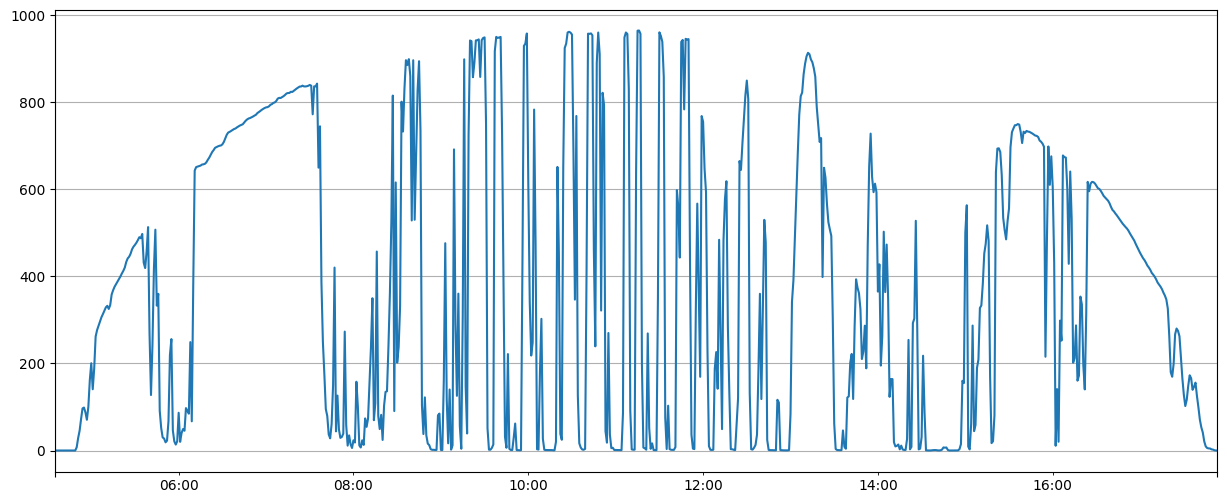

In [11]:
model_persistence_lag1_df.loc['2023-04-05']['DNI'].plot(figsize=(15, 6), grid=True)

In [12]:
display(model_persistence_lag1_df)
model_persistence_lag1_df['Error'] = model_persistence_lag1_df[data_loader.get_target_names()[0]] - model_persistence_lag1_df[data_loader.get_feature_names()[0]]
model_persistence_lag1_df['timestamp'] = pd.to_datetime(model_persistence_lag1_df.index)
model_persistence_lag1_df['date'] = model_persistence_lag1_df['timestamp'].dt.date
model_persistence_lag1_df['minute_of_day'] = model_persistence_lag1_df['timestamp'].dt.hour * 60 + model_persistence_lag1_df['timestamp'].dt.minute
display(model_persistence_lag1_df)
import numpy as np
model_persistence_lag1_df['squared_error'] = (model_persistence_lag1_df['Error']) ** 2
rmse_df = (
    model_persistence_lag1_df
    .groupby(['minute_of_day'])['squared_error']
    .mean()
    .reset_index()
)
rmse_df['rmse'] = np.sqrt(rmse_df['squared_error'])
rmse_df = rmse_df.drop(columns='squared_error')
model_persistence_lag1_rmse_df = rmse_df.copy()
rmse_df

,DNI,DNI_lag_1,Error
2023-01-01 07:44:00,0.077426,0.069318,0.008107
2023-01-01 07:45:00,0.070297,0.077426,-0.007128
2023-01-01 07:46:00,0.070537,0.070297,0.000240
2023-01-01 07:47:00,0.063348,0.070537,-0.007188
2023-01-01 07:48:00,0.071975,0.063348,0.008626
...,...,...,...
2024-12-30 14:38:00,0.000000,0.000000,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000
2024-12-30 14:40:00,0.000000,0.000000,0.000000
2024-12-30 14:41:00,0.000000,0.000000,0.000000


,DNI,DNI_lag_1,Error,timestamp,date,minute_of_day
2023-01-01 07:44:00,0.077426,0.069318,0.008107,2023-01-01 07:44:00,2023-01-01,464
2023-01-01 07:45:00,0.070297,0.077426,-0.007128,2023-01-01 07:45:00,2023-01-01,465
2023-01-01 07:46:00,0.070537,0.070297,0.000240,2023-01-01 07:46:00,2023-01-01,466
2023-01-01 07:47:00,0.063348,0.070537,-0.007188,2023-01-01 07:47:00,2023-01-01,467
2023-01-01 07:48:00,0.071975,0.063348,0.008626,2023-01-01 07:48:00,2023-01-01,468
...,...,...,...,...,...,...
2024-12-30 14:38:00,0.000000,0.000000,0.000000,2024-12-30 14:38:00,2024-12-30,878
2024-12-30 14:39:00,0.000000,0.000000,0.000000,2024-12-30 14:39:00,2024-12-30,879
2024-12-30 14:40:00,0.000000,0.000000,0.000000,2024-12-30 14:40:00,2024-12-30,880
2024-12-30 14:41:00,0.000000,0.000000,0.000000,2024-12-30 14:41:00,2024-12-30,881


,minute_of_day,rmse
0,148,0.000000
1,149,0.000000
2,150,0.000828
3,151,0.002577
4,152,0.001416
...,...,...
1044,1192,0.017255
1045,1193,0.005840
1046,1194,0.000000
1047,1195,0.000000


In [13]:
from data_loader import MyDataLoader, SPLIT
from my_config import MyConfig, load_config

my_config: MyConfig = load_config(r'C:\Users\lucas\PycharmProjects\Solar-Irradiance-Nowcasting\configs\dni_only\dni_lag60.json')
data_loader = MyDataLoader(my_config)
data_loader.load_data()
data_loader.reindex_full_range()
data_loader.lag_features()
data_loader.prepare_df(drop_solar_altitude_below_0=True, drop_nan=True)
model_persistence_lag60_df = data_loader.get_split(SPLIT.TEST)
model_persistence_lag60_df['Error'] = model_persistence_lag60_df[data_loader.get_target_names()[0]] - model_persistence_lag60_df[data_loader.get_feature_names()[0]]
print(f'Min error: {model_persistence_lag60_df["Error"].min()}, Max error: {model_persistence_lag60_df["Error"].max()}')
display(model_persistence_lag60_df)
model_persistence_lag60_df['Error'] = model_persistence_lag60_df[data_loader.get_target_names()[0]] - model_persistence_lag60_df[data_loader.get_feature_names()[0]]
model_persistence_lag60_df['timestamp'] = pd.to_datetime(model_persistence_lag60_df.index)
model_persistence_lag60_df['date'] = model_persistence_lag60_df['timestamp'].dt.date
model_persistence_lag60_df['minute_of_day'] = model_persistence_lag60_df['timestamp'].dt.hour * 60 + model_persistence_lag60_df['timestamp'].dt.minute
display(model_persistence_lag60_df)
import numpy as np
model_persistence_lag60_df['squared_error'] = (model_persistence_lag60_df['Error']) ** 2
rmse_df = (
    model_persistence_lag60_df
    .groupby(['minute_of_day'])['squared_error']
    .mean()
    .reset_index()
)
rmse_df['rmse'] = np.sqrt(rmse_df['squared_error'])
rmse_df = rmse_df.drop(columns='squared_error')
model_persistence_lag60_rmse_df = rmse_df.copy()
rmse_df

Min error: -966.6108445600717, Max error: 964.2317139174247


,DNI,DNI_lag_60,Error
2023-01-01 08:43:00,0.004765,0.069318,-0.064553
2023-01-01 08:44:00,0.000000,0.077426,-0.077426
2023-01-01 08:45:00,0.000000,0.070297,-0.070297
2023-01-01 08:46:00,0.000000,0.070537,-0.070537
2023-01-01 08:47:00,0.000000,0.063348,-0.063348
...,...,...,...
2024-12-30 14:38:00,0.000000,0.000000,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000
2024-12-30 14:40:00,0.000000,0.000000,0.000000
2024-12-30 14:41:00,0.000000,0.000000,0.000000


,DNI,DNI_lag_60,Error,timestamp,date,minute_of_day
2023-01-01 08:43:00,0.004765,0.069318,-0.064553,2023-01-01 08:43:00,2023-01-01,523
2023-01-01 08:44:00,0.000000,0.077426,-0.077426,2023-01-01 08:44:00,2023-01-01,524
2023-01-01 08:45:00,0.000000,0.070297,-0.070297,2023-01-01 08:45:00,2023-01-01,525
2023-01-01 08:46:00,0.000000,0.070537,-0.070537,2023-01-01 08:46:00,2023-01-01,526
2023-01-01 08:47:00,0.000000,0.063348,-0.063348,2023-01-01 08:47:00,2023-01-01,527
...,...,...,...,...,...,...
2024-12-30 14:38:00,0.000000,0.000000,0.000000,2024-12-30 14:38:00,2024-12-30,878
2024-12-30 14:39:00,0.000000,0.000000,0.000000,2024-12-30 14:39:00,2024-12-30,879
2024-12-30 14:40:00,0.000000,0.000000,0.000000,2024-12-30 14:40:00,2024-12-30,880
2024-12-30 14:41:00,0.000000,0.000000,0.000000,2024-12-30 14:41:00,2024-12-30,881


,minute_of_day,rmse
0,207,226.957250
1,208,165.923713
2,209,178.851295
3,210,178.215338
4,211,175.985875
...,...,...
985,1192,212.040302
986,1193,198.505051
987,1194,207.142300
988,1195,202.469904


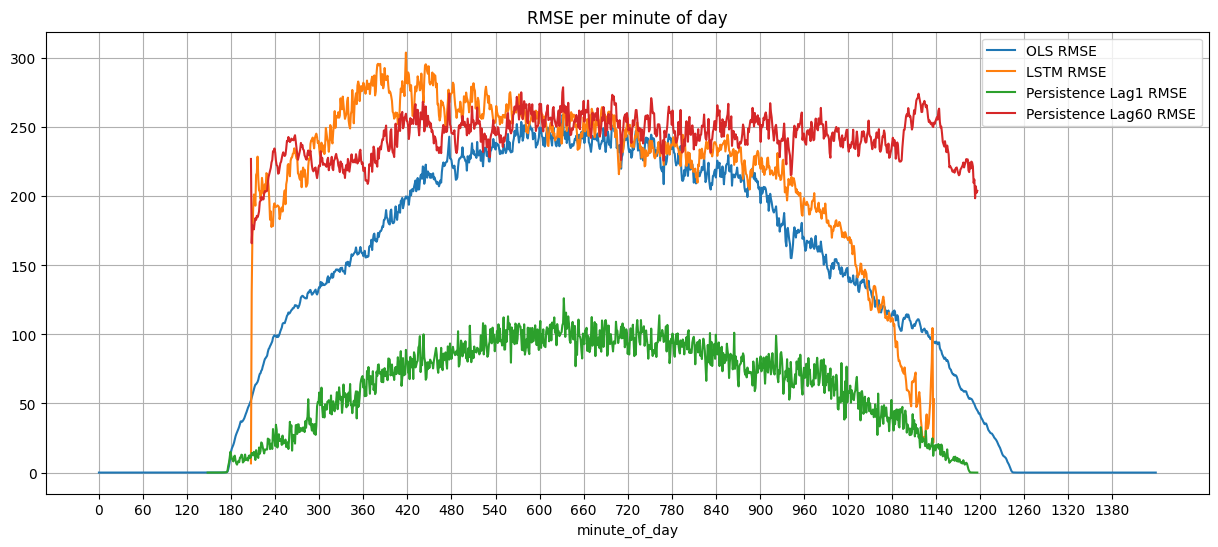

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))
model_ols_rmse_df.plot(x='minute_of_day', y='rmse', figsize=(15, 6), title='RMSE per minute of day', grid=True, ax=ax, label='OLS RMSE')
model_lstm_rmse_df.plot(x='minute_of_day', y='rmse', figsize=(15, 6), title='RMSE per minute of day', grid=True, ax=ax, label='LSTM RMSE')
model_persistence_lag1_rmse_df.plot(x='minute_of_day', y='rmse', figsize=(15, 6), title='RMSE per minute of day', grid=True, ax=ax, label='Persistence Lag1 RMSE')
model_persistence_lag60_rmse_df.plot(x='minute_of_day', y='rmse', figsize=(15, 6), title='RMSE per minute of day', grid=True, ax=ax, label='Persistence Lag60 RMSE')
# set x axis to human readable time format
ax.set_xticks(range(0, 1440, 60))  # Every hour

C:\Users\lucas\AppData\Local\Temp\ipykernel_4208\715976228.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  minute_600_data.hist(bins=30, alpha=0.6, ax=ax)
C:\Users\lucas\AppData\Local\Temp\ipykernel_4208\715976228.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


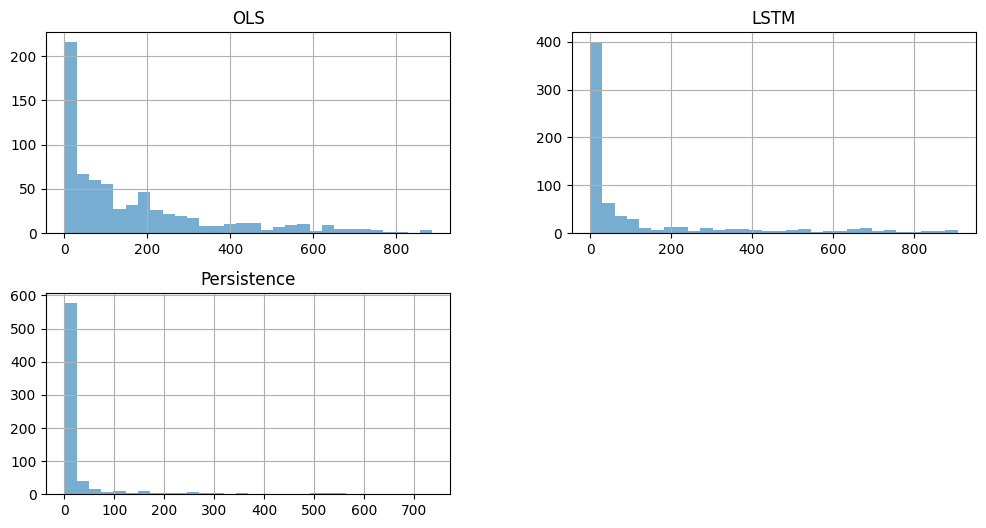

In [15]:
minute_600_data = pd.DataFrame({
    'OLS': abs(model_ols_df[model_ols_df['minute_of_day'] == 600]['Error']),
    'LSTM': abs(model_lstm_df[model_lstm_df['minute_of_day'] == 600]['Error']),
    'Persistence': abs(model_persistence_lag1_df[model_persistence_lag1_df['minute_of_day'] == 600]['Error'])
})

fig, ax = plt.subplots(figsize=(12, 6))
minute_600_data.hist(bins=30, alpha=0.6, ax=ax)
plt.title('Distribution of Absolute Errors at Minute 600 (10:00 AM)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()


# Summary Statistics for Absolute Errors at Minute 600

In [16]:
# stats_df = pd.DataFrame({
#     'Model': ['OLS', 'LSTM', 'Persistence'],
#     'Mean': [
#         selected_time_df_ols.mean(),
#         selected_time_df_lstm.mean(),
#         selected_time_df_persistence.mean()
#     ],
#     'Median': [
#         selected_time_df_ols.median(),
#         selected_time_df_lstm.median(),
#         selected_time_df_persistence.median()
#     ]
# })
#
# display(stats_df)


In [17]:
model_ols_df

,Actual,Predicted,Error,timestamp,date,minute_of_day,squared_error
2023-01-01 08:43:00,0.004765,1.937249,-1.932484,2023-01-01 08:43:00,2023-01-01,523,3.734494
2023-01-01 08:44:00,0.000000,2.087521,-2.087521,2023-01-01 08:44:00,2023-01-01,524,4.357743
2023-01-01 08:45:00,0.000000,2.757329,-2.757329,2023-01-01 08:45:00,2023-01-01,525,7.602866
2023-01-01 08:46:00,0.000000,2.400412,-2.400412,2023-01-01 08:46:00,2023-01-01,526,5.761978
2023-01-01 08:47:00,0.000000,2.288358,-2.288358,2023-01-01 08:47:00,2023-01-01,527,5.236582
...,...,...,...,...,...,...,...
2024-12-30 14:36:00,0.000000,0.000000,0.000000,2024-12-30 14:36:00,2024-12-30,876,0.000000
2024-12-30 14:37:00,0.000000,0.000000,0.000000,2024-12-30 14:37:00,2024-12-30,877,0.000000
2024-12-30 14:38:00,0.000000,0.000000,0.000000,2024-12-30 14:38:00,2024-12-30,878,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000,2024-12-30 14:39:00,2024-12-30,879,0.000000


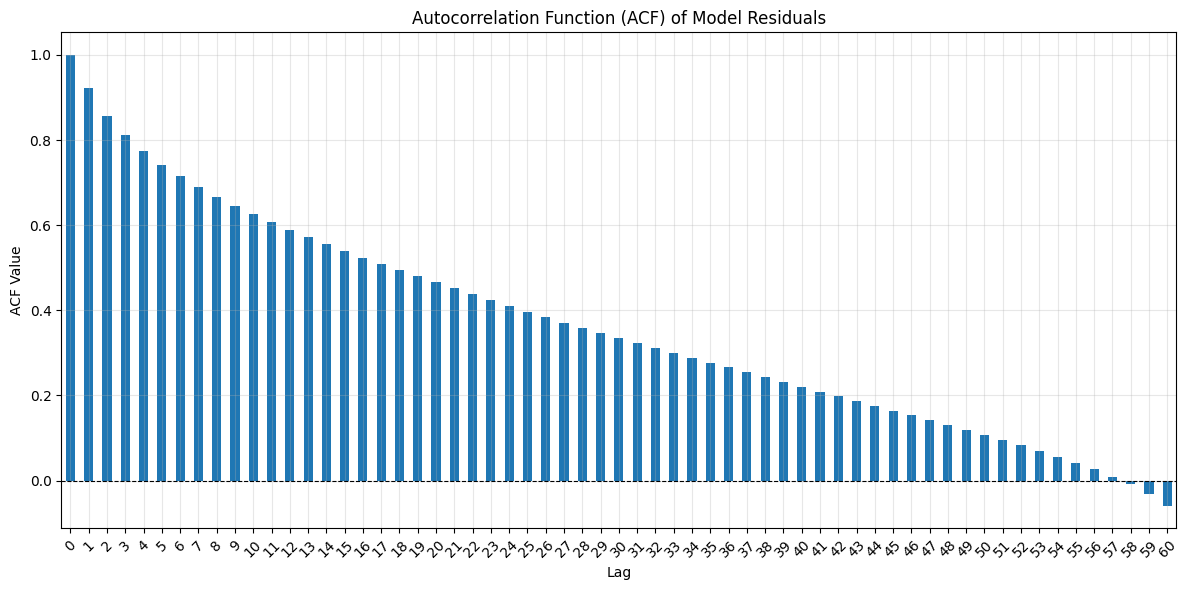

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

# Compute residuals using the correct column names
df = model_lstm_df.copy()
df['residual'] = df['Error']

# Compute autocorrelation values for the residuals up to lag 20
from statsmodels.tsa.stattools import acf
acf_values = acf(df['residual'], nlags=60, fft=True)
lags = list(range(len(acf_values)))
acf_df = pd.DataFrame({'lag': lags, 'acf': acf_values})
# plot ACF values
fig, ax = plt.subplots(figsize=(12, 6))
acf_df.plot(x='lag', y='acf', kind='bar', ax=ax, legend=False)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax.set_title('Autocorrelation Function (ACF) of Model Residuals')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [19]:
model_ols_df

,Actual,Predicted,Error,timestamp,date,minute_of_day,squared_error
2023-01-01 08:43:00,0.004765,1.937249,-1.932484,2023-01-01 08:43:00,2023-01-01,523,3.734494
2023-01-01 08:44:00,0.000000,2.087521,-2.087521,2023-01-01 08:44:00,2023-01-01,524,4.357743
2023-01-01 08:45:00,0.000000,2.757329,-2.757329,2023-01-01 08:45:00,2023-01-01,525,7.602866
2023-01-01 08:46:00,0.000000,2.400412,-2.400412,2023-01-01 08:46:00,2023-01-01,526,5.761978
2023-01-01 08:47:00,0.000000,2.288358,-2.288358,2023-01-01 08:47:00,2023-01-01,527,5.236582
...,...,...,...,...,...,...,...
2024-12-30 14:36:00,0.000000,0.000000,0.000000,2024-12-30 14:36:00,2024-12-30,876,0.000000
2024-12-30 14:37:00,0.000000,0.000000,0.000000,2024-12-30 14:37:00,2024-12-30,877,0.000000
2024-12-30 14:38:00,0.000000,0.000000,0.000000,2024-12-30 14:38:00,2024-12-30,878,0.000000
2024-12-30 14:39:00,0.000000,0.000000,0.000000,2024-12-30 14:39:00,2024-12-30,879,0.000000


<Axes: >

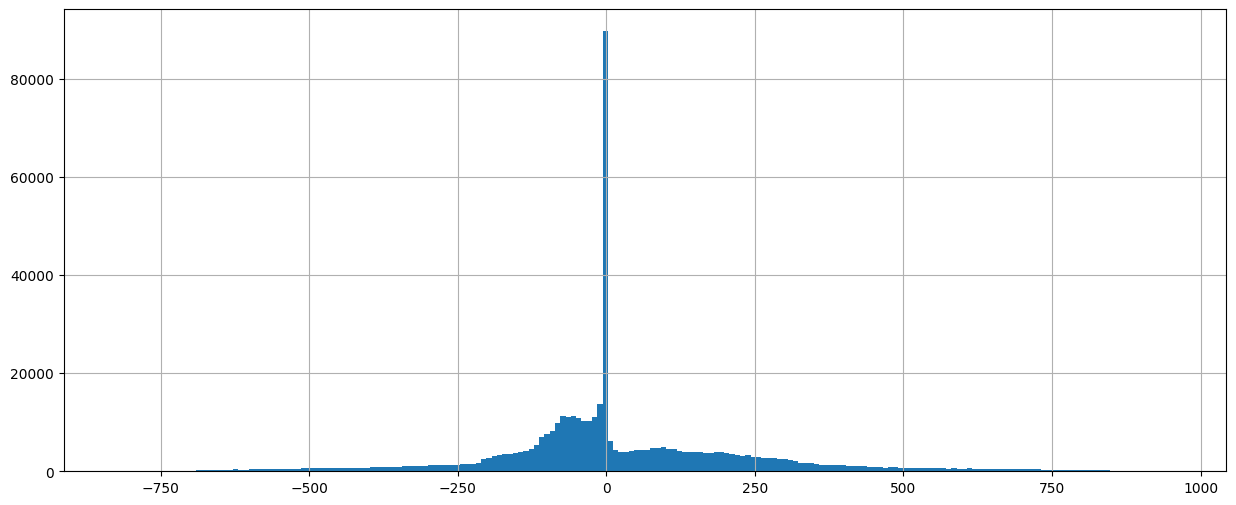

In [20]:
fig = plt.figure(figsize=(15, 6))
model_ols_df['Error'].hist(bins=200)


<Axes: >

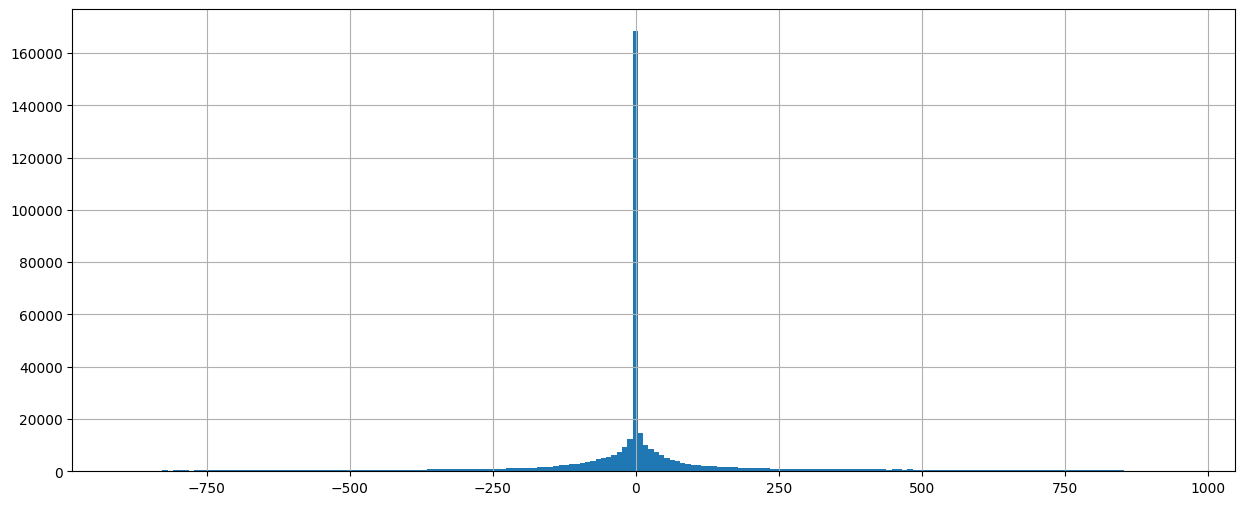

In [21]:
fig = plt.figure(figsize=(15, 6))
model_lstm_df['Error'].hist(bins=200)

<Axes: >

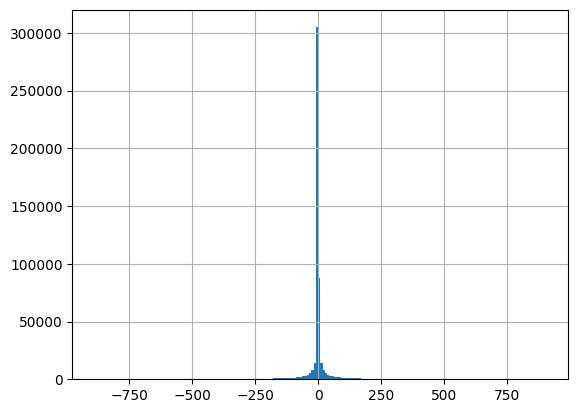

In [22]:
model_persistence_lag1_df['Error'].hist(bins=200)